In [2]:
import google.generativeai as genai
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [23]:
import os
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [18]:
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('123')

In [24]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827


In [25]:
import pathlib
import textwrap
import os

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of the LLM, using the 'gemini-pro' model with a specified creativity level
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)

# Send a creative prompt to the LLM
response = llm.invoke('Define Generative AI.')
to_markdown(response.content)
#print(response.content)

> **Generative AI** refers to a type of artificial intelligence that can create new data, content, or artifacts from existing data. Unlike traditional AI systems that are trained on specific tasks and perform repetitive operations, generative AI models possess the ability to generate novel and unique outputs that are not explicitly programmed.
> 
> **Core Characteristics:**
> 
> * **Generative:** Creates new data or content, rather than merely classifying or predicting existing data.
> * **Unsupervised:** Typically trained on unlabeled or unstructured data, learning patterns and structures without human guidance.
> * **Diverse:** Can generate a wide range of outputs, extending beyond the training data set.
> * **Novel:** Outputs are original and not simply reproductions of existing data.
> * **Adaptive:** Can adjust and improve its generative models based on feedback or additional data.
> 
> **Applications:**
> 
> Generative AI has numerous applications across various fields, including:
> 
> * **Natural Language Processing:** Text generation, machine translation, dialogue systems
> * **Computer Vision:** Image generation, image editing, object detection
> * **Music Generation:** Composition, arrangement, performance
> * **Drug Discovery:** Molecule design, drug repurposing
> * **Art and Entertainment:** Artistic content creation, game development
> 
> **Types of Generative AI Models:**
> 
> * **Generative Adversarial Networks (GANs)**: Two competing networks (generator and discriminator) that train each other until the generator can produce convincing fake data.
> * **Variational Autoencoders (VAEs)**: Encodes input data into a latent space and then decodes it to generate new samples.
> * **Transformer-based Models (e.g., GPT-3, BERT)**: Language models that use attention mechanisms to understand and generate language.
> * **Diffusion Models:** Gradually add noise to an image and then learn to reverse the process to generate images from noise.
> 
> **Benefits:**
> 
> * **Content Creation:** Enables the automated generation of high-quality content, such as text, images, and music.
> * **Data Augmentation:** Generates synthetic data to supplement existing datasets, improving AI models.
> * **Creativity and Innovation:** Fosters creativity and supports idea generation by providing diverse and unique outputs.
> * **Personalization:** Customizes experiences by generating personalized content tailored to individual preferences.

In [12]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Set up a prompt template
prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

# Create a chain that utilizes both the LLM and the prompt template
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)
topic = 'Why will AI change the world'
response = chain.invoke(input=topic)
print(response)


Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Prompt after formatting:
You are a content creator. Write me a tweet about Why will AI change the world

> Finished chain.
{'topic': 'Why will AI change the world', 'text': "📣 AI is poised to revolutionize our world! Here's why:\n\n⚙️ Automation: AI automates tasks, freeing up human workers to focus on more complex and creative endeavors.\n📈 Efficiency: AI optimizes processes, leading to significant gains in productivity and cost savings.\n💡 Innovation: AI drives innovation by providing insights, identifying patterns, and generating novel ideas.\n💻 Personalization: AI personalizes experiences, tailoring services and products to individual preferences.\n🌐 Global impact: AI transcends borders, fostering collaboration and solving global challenges. Prepare for the transformative power of AI! #ArtificialIntelligence"}


In [14]:
from langchain_core.messages import HumanMessage, SystemMessage

# Setup with system message conversion
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke([
    SystemMessage(content='Answer only YES or NO in English.'),
    HumanMessage(content='Is lahore in Pakistan?')
])
print(output.content)

c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\langchain_google_genai\chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


YES


In [30]:
import pathlib
import textwrap
# Used to securely store your API key

from IPython.display import display
from IPython.display import Markdown

In [31]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [22]:
# BATCH
results = llm.batch(
    [
        "What is name of CEO of Google?",
        "Who is the best leader of pakistan?",
        "Who is the Current famous political leader of pakistan?",
    ]
)

for res in results:
    display(to_markdown(res.content))

c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\langchain_google_genai\chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\langchain_google_genai\chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\langchain_google_genai\chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


> Sundar Pichai

> The best leader of Pakistan is a matter of opinion, as different people may have different criteria for what constitutes a "good" leader. However, some of the most commonly cited leaders who are considered to have been among the best include:
> 
> * **Muhammad Ali Jinnah:** Jinnah is considered the founder of Pakistan, and is widely respected for his leadership in the struggle for independence from British rule. He is known for his integrity, his commitment to democracy, and his vision for a united and prosperous Pakistan.
> * **Muhammad Ayub Khan:** Ayub Khan was the first military ruler of Pakistan, and served from 1958 to 1969. He is credited with bringing stability to the country after a period of political turmoil, and for launching a number of economic reforms that helped to improve the lives of ordinary Pakistanis.
> * **Zulfikar Ali Bhutto:** Bhutto was the first elected Prime Minister of Pakistan, and served from 1973 to 1977. He is known for his charismatic leadership and his commitment to social justice. He is also credited with nationalizing key industries and implementing a number of social welfare programs.
> * **Benazir Bhutto:** Benazir Bhutto was the first female Prime Minister of Pakistan, and served from 1988 to 1990 and again from 1993 to 1996. She is known for her courage and her commitment to democracy. She was assassinated in 2007.
> 
> These are just a few of the many leaders who have made significant contributions to Pakistan. Ultimately, the best leader is the one who is able to meet the needs of the people and to lead the country towards a brighter future.

> Shehbaz Sharif

# Image Recognition


In [33]:
! pip install pillow -q

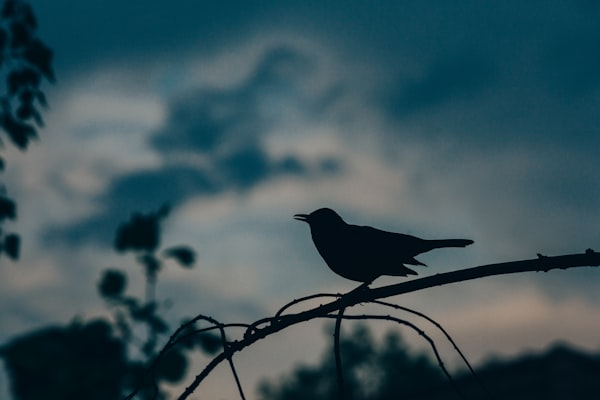

In [7]:
import requests
from IPython.display import Image

image_url = "https://images.unsplash.com/photo-1463003160077-801f9fd8d095?q=80&w=600"
content = requests.get(image_url).content
Image(content)

In [9]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image? What mood does the image represents?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)

output_message = llm.invoke([message])
content_text = to_markdown(output_message.content)
content_text

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting

In [52]:
def get_image(url, filename):
  content = requests.get(url).content
  with open(f'{filename}.png', 'wb') as f:
    f.write(content)
  image = Image.open(f"{filename}.png")
  image.show()
  return image

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [54]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/b434966d-c850-4aa7-be6c-e99c0e236362/air-max-plus-mens-shoes-3mH52P.png", "nike3")
plt.imshow(image)
plt.show()

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image? provide full detail as possible.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
print(
    llm.invoke([message]).content
)

AttributeError: type object 'Image' has no attribute 'open'

In [57]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Function to download and display the image
def get_image(url, filename):
    # Send the HTTP GET request to download the image
    response = requests.get(url)
    content = response.content
    
    # Save the image to a local file
    with open(f'{filename}.png', 'wb') as f:
        f.write(content)
    
    # Open the saved image using Pillow (PIL)
    image = Image.open(f"{filename}.png")
    
    return image




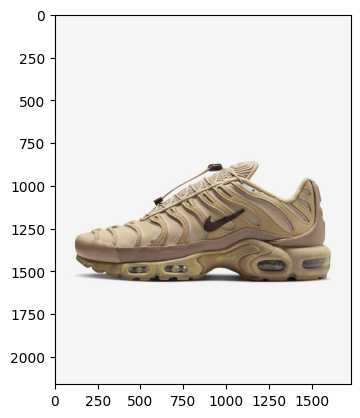

AttributeError: 'JpegImageFile' object has no attribute 'startswith'

In [59]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/b434966d-c850-4aa7-be6c-e99c0e236362/air-max-plus-mens-shoes-3mH52P.png", "nike3")
plt.imshow(image)
plt.show()

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image? provide full detail as possible.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
print(
    llm.invoke([message]).content
)